In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the codes provided.

In [4]:
class LinearRegression:
  def __init__(self, learning_rate, epochs):
    self.lr=learning_rate
    self.epochs=epochs

  def fit(self, X_train, y_train):
    n_samples, n_features = X_train.shape
    y_train=y_train.reshape(-1,1)
    self.w = np.zeros((n_features, 1))
    self.b = 0

    for i in range(self.epochs):
      delta= -(y_train-np.dot(X_train,self.w)-self.b)/n_samples
      dw= np.dot(X_train.T,delta)
      db= np.sum(delta).reshape(1,1)
      self.w-= self.lr * dw
      self.b-= self.lr* db

  def predict(self, X_test):
    y_test=np.dot(X_test, self.w) + self.b
    return y_test


## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

In [56]:
  df=pd.read_csv("Real estate.csv")
  print(df)

      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 3

In [57]:
df.isnull().values.any()

np.False_

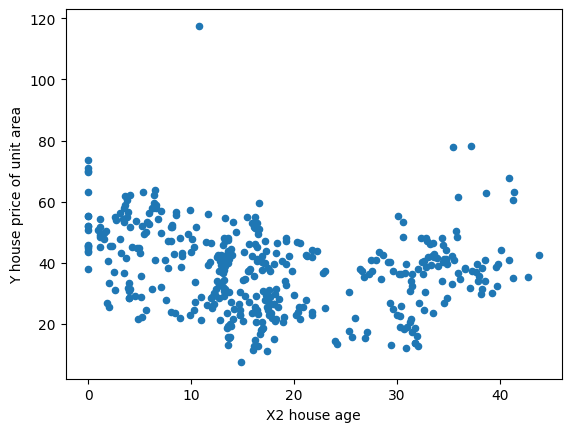

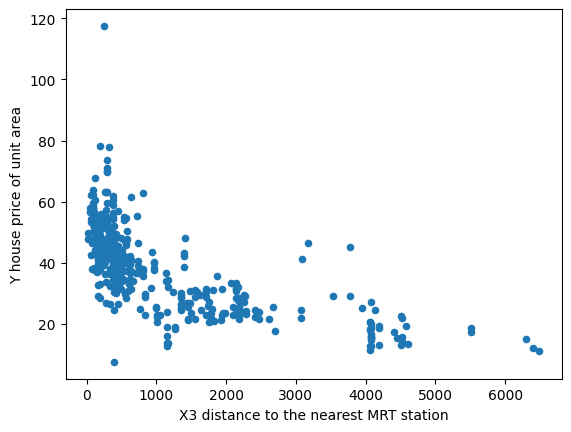

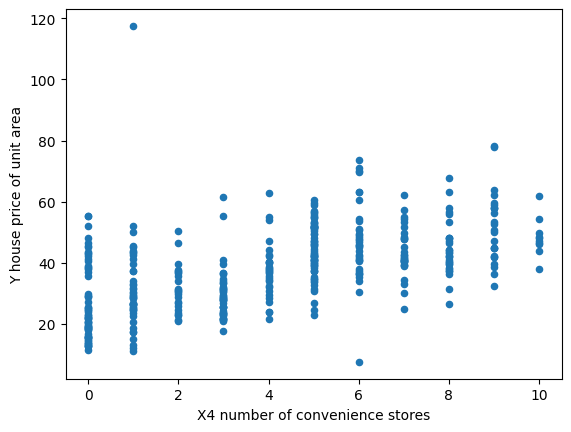

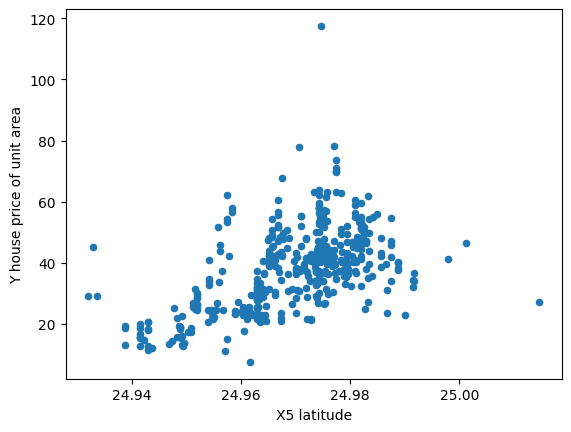

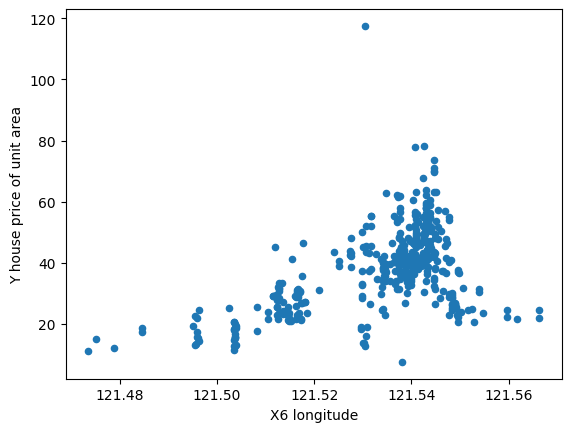

In [58]:
df.plot(x="X2 house age", y="Y house price of unit area", kind='scatter')
plt.show()
df.plot(x="X3 distance to the nearest MRT station", y="Y house price of unit area", kind='scatter')
plt.show()
df.plot(x="X4 number of convenience stores", y="Y house price of unit area", kind='scatter')
plt.show()
df.plot(x="X5 latitude", y="Y house price of unit area", kind='scatter')
plt.show()
df.plot(x="X6 longitude", y="Y house price of unit area", kind='scatter')
plt.show()

In [59]:
df['X3 inverse of distance to the nearest MRT station']=1/df['X3 distance to the nearest MRT station']
del df['X3 distance to the nearest MRT station']
del df['X1 transaction date']
print(df)

      No  X2 house age  X4 number of convenience stores  X5 latitude  \
0      1          32.0                               10     24.98298   
1      2          19.5                                9     24.98034   
2      3          13.3                                5     24.98746   
3      4          13.3                                5     24.98746   
4      5           5.0                                5     24.97937   
..   ...           ...                              ...          ...   
409  410          13.7                                0     24.94155   
410  411           5.6                                9     24.97433   
411  412          18.8                                7     24.97923   
412  413           8.1                                5     24.96674   
413  414           6.5                                9     24.97433   

     X6 longitude  Y house price of unit area  \
0       121.54024                        37.9   
1       121.53951                    

In [60]:
from sklearn.model_selection import train_test_split
X=df[['X2 house age','X3 inverse of distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y=df['Y house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = np.array(scaler.fit_transform(X_train))
X_test = np.array(scaler.transform(X_test))

In [64]:
y_train=np.array(y_train)
y_test=np.array(y_test)
model=LinearRegression(0.01,1000)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [65]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error of custom model: {mse}")
print(f"R-squared Score of custom model: {r2}")


Mean Squared Error of custom model: 80.5922837305668
R-squared Score of custom model: 0.491911548076569


In [67]:
from sklearn.linear_model import LinearRegression as SklearnLinearRegression

sklearn_model = SklearnLinearRegression()
sklearn_model.fit(X_train, y_train)

y_pred_sklearn = sklearn_model.predict(X_test)

mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print(f"Mean Squared Error of sklearn model: {mse_sklearn}")
print(f"R-squared Score of sklearn model: {r2_sklearn}")

Mean Squared Error of sklearn model: 68.75150732415636
R-squared Score of sklearn model: 0.5665609000420447


# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [71]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = MinMaxScaler()
X_train = np.array(scaler.fit_transform(X_train))
X_test = np.array(scaler.transform(X_test))


5. Write code for the sigmoid function and Logistic regression.


In [72]:
def sigmoid(z):
    a=1.0/(1.0+ np.exp(-z))
    return a
def derivative(self,z):
    return self.sigmoid(z)*(1-self.sigmoid(z))

class LogisticReg:
    def __init__(self, learning_rate, epochs):
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights=np.random.randn(n_features,1)/np.sqrt(n_features)
        self.bias= np.random.randn(1,1)

        for i in range(self.epochs):
            z = np.dot(X,self.weights) + self.bias
            y_pred = sigmoid(z)
            dw = -np.dot(X.T,(y - y_pred))/n_samples
            db = -np.sum(y - y_pred)/n_samples
            self.weights -= self.lr* dw
            self.bias-= self.lr* db

    def predict(self, X):
        y_pred = np.dot(X,self.weights)+self.bias

        for i in range(len(y_pred)):
            if y_pred[i]<= 0.5:
                y_pred[i] = 0
            else:
                y_pred[i] = 1
        return y_pred

In [73]:
model=LogisticReg(0.01,1000)
model.fit(X_train, y_train)
y_pred_custom=model.predict(X_test)

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [74]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score
print(f"Accuracy Score of Custom Model: {accuracy_score(y_test, y_pred_custom)}")
print(f"Accuracy Score of sklearn Model: {accuracy_score(y_test, y_pred)}")

Accuracy Score of Custom Model: 0.7132867132867133
Accuracy Score of sklearn Model: 0.9790209790209791


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .


10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [82]:
from sklearn.metrics import classification_report

print(f"Classification Report of Custom Model:{classification_report(y_test, y_pred_custom)}")

print(f"Classification Report of sklearn Model:{classification_report(y_test, y_pred)}")

Classification Report of Custom Model:              precision    recall  f1-score   support

           0       0.57      1.00      0.72        54
           1       1.00      0.54      0.70        89

    accuracy                           0.71       143
   macro avg       0.78      0.77      0.71       143
weighted avg       0.84      0.71      0.71       143

Classification Report of sklearn Model:              precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.98      0.99      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [83]:
from sklearn.metrics import confusion_matrix
print(f"Confusion Matrix of Custom Model:{confusion_matrix(y_test,y_pred)}")
print(f"Confusion Matrix of sklearn Model:{confusion_matrix(y_test,y_pred_custom)}")

Confusion Matrix of Custom Model:[[52  2]
 [ 1 88]]
Confusion Matrix of sklearn Model:[[54  0]
 [41 48]]


# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [84]:
  df2=pd.read_csv("glass.csv")
  print(df2)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]


In [85]:
X = df2.drop(['Type'], axis=1)
y = df2['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)


4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [86]:
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [87]:
knn = KNN(k=3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print("Custom KNN classification accuracy", accuracy_score(y_test, predictions))

Custom KNN classification accuracy 0.6851851851851852


In [89]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=3)

sklearn_knn.fit(X_train, y_train)

y_pred_sklearn_knn = sklearn_knn.predict(X_test)

print("Sklearn KNN classification accuracy", accuracy_score(y_test, y_pred_sklearn_knn))

Sklearn KNN classification accuracy 0.7037037037037037
